Tiempo de ejecución maximo:  0.008097648620605469  segundos
Plots:



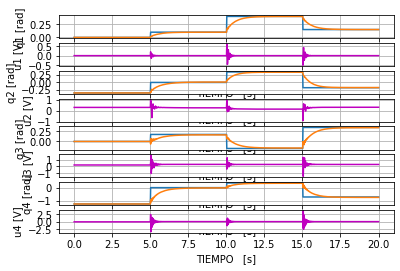

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import time
# PARÁMETROS DE SINTONIZACIÓN
Lambda=2
ld = 15
Kd =1
Gamma = 0.008
s_lim=0.015
# PARÁMETROS DE CONTROL
I = np.eye(4,4)
Ld = ld*I
# DATOS DEL SUB-SISTEMA MECANICO
# Masas
m1 = 0.105
m2 = 0.142
m3=0.135
m4=0.236
#Longitudes de los eslabones
l1_z = 0.0266
L1_z=0.043
L0_z=0.034
l2_y=0.106
L2_x=-0.024
L2_y=0.128
l3_y=0.0933
L3_y=0.124
l4_y=0.060
L4_y=0.126
# Inercias de eslabones y motores
Ixx1=107819*1e-09
Iyy1=103553*1e-09
Izz1=17644*1e-09
Ixx2=1836523*1e-09
Iyy2=1856215*1e-09
Izz2=54940*1e-09
Ixx3=1358961*1e-09
Iyy3=1350228*1e-09
Izz3=24835*1e-09
Ixx4=1128335*1e-09
Iyy4=1077791*1e-09
Izz4=182774*1e-09
Jm=0.0000071
Jg=0.0000053
# Jeq=(n**2)*Jm+Jg
Jeq=0.0037
#Gravedad y relacion de trnasmision
#   n=353.5
n=353.5
g=-9.81
#Constantes de friccion motores:
# Bm=0.0001 Bg=0.01 
# Beq=(n**2)*Bm+Bg
Beq=0.00012
# DATOS DEL SUB-SISTEMA ELECTRICO
#   Km=0.0458 Kb=0.0458 KA=8.5 Ra=2.49Ka=8.5
Km=0.005
Kb=1
KA=1
Ra=1
Ka=1  
# Keq=Beq+(n**2)*Km*Kb/Ra
Keq=Beq
U_lin=1/(Km*n)
# PARAMETROS DEL MODELO DINAMICO:
ae1=l2_y*m2
ae2=l2_y**2*m2
ae3=m3
ae4=l3_y*m3
ae5=l3_y**2*m3
ae6=m4
ae7=l4_y*m4
ae8=l4_y**2*m4
ae9=Izz1
ae10=Iyy2
ae11=(Ixx2+Izz2)
ae12=(Izz2-Ixx2)
ae13=(Ixx2-Izz2)
ae14=Iyy3
ae15=(Ixx3+Izz3)
ae16=(Izz3-Ixx3)
ae17=(Ixx3-Izz3)
ae18=Iyy4
ae19=(Ixx4+Izz4)
ae20=(Izz4-Ixx4)
ae21=(Ixx4-Izz4)
ae22=Jeq
ae23=Keq
ae=U_lin*np.array([[ae1],[ae2],[ae3],[ae4],[ae5],[ae6],[ae7],[ae8],[ae9],[ae10],[ae11],[ae12],[ae13],[ae14],[ae15],[ae16],[ae17],[ae18],[ae19],[ae20],[ae11],[ae22],[ae23]])
# Iniciaalizar parámetros

# CONDICIONES INICIALES
# VALORES INICIALES
q = np.array([[np.deg2rad(0)], [np.deg2rad(-20)],[np.deg2rad(0)],[np.deg2rad(-70)]], dtype=np.float64)
dq = np.array([[0], [0],[0], [0]], dtype=np.float64)
qe= np.array([[np.deg2rad(0)], [np.deg2rad(-20)],[np.deg2rad(0)],[np.deg2rad(-70)]], dtype=np.float64) 
dqe=np.array([[0], [0],[0], [0]], dtype=np.float64)
dqd = np.array([[0], [0],[0], [0]], dtype=np.float64)
ddqd =  np.array([[0], [0],[0], [0]], dtype=np.float64)
qd=np.array([[0], [0],[0], [0]], dtype=np.float64)
qtilde = np.array([[0], [0],[0], [0]], dtype=np.float64)
dqr = np.array([[np.deg2rad(0)], [np.deg2rad(0)],[np.deg2rad(0)],[np.deg2rad(0)]], dtype=np.float64)
ddqr =  np.array([[0], [0],[0], [0]], dtype=np.float64)
s =  np.array([[0], [0],[0], [0]], dtype=np.float64)
dqtilde =  np.array([[0], [0],[0], [0]], dtype=np.float64)

# TIEMPO DE MUESTREO
T = 0.02

# VALORES PARA GENERACION DE TRAYECTORIAS
Tp = 5
A = 0.5
nn = 1000 
#   if(tap==0)
#     B = 0.0005 
#   else
#     B = 0.001
#   end

# VARIABLES PARA ALMACENAR DATOS
Q1=np.zeros((1,nn), dtype=np.float64)
Q2=np.zeros((1,nn), dtype=np.float64)
Q3=np.zeros((1,nn), dtype=np.float64)
Q4=np.zeros((1,nn), dtype=np.float64)
Qd1=np.zeros((1,nn), dtype=np.float64)
Qd2=np.zeros((1,nn), dtype=np.float64)
Qd3=np.zeros((1,nn), dtype=np.float64)
Qd4=np.zeros((1,nn), dtype=np.float64)
U1=np.zeros((1,nn), dtype=np.float64)
U2=np.zeros((1,nn), dtype=np.float64)
U3=np.zeros((1,nn), dtype=np.float64)
U4=np.zeros((1,nn), dtype=np.float64)
tr=2-1
execution_time_max=0
# LAZO DE CONTROL
for k in np.arange(0, nn):
    
    
    start_time = time.time()
    #     GENERACIÓN DE LA TRAYECTORIA

    # REFERENCIAS DESEADAS Cuadradas
    if k >= 0 and k <= nn/4:
        qd[0,0] = np.deg2rad(0)
        qd[1,0] = np.deg2rad(-20)
        qd[2,0] = np.deg2rad(0)
        qd[3,0] = np.deg2rad(-70)
    elif k >= nn/4 and k <= nn/2:
        qd[0,0] = 0.2*A
        qd[1,0] = np.deg2rad(0)
        qd[2,0] = np.deg2rad(10)
        qd[3,0] = np.deg2rad(0)
    elif k >= nn/2 and k <= 3*nn/4:
        qd[0,0] = 0.8*A
        qd[1,0] = np.deg2rad(20)
        qd[2,0] = np.deg2rad(-10)
        qd[3,0] = np.deg2rad(20)
    elif k >= 3*nn/4 and k <= nn:
        qd[0,0] = 0.3*A
        qd[1,0] = np.deg2rad(-10)
        qd[2,0] = np.deg2rad(20)
        qd[3,0] = np.deg2rad(-40)
    

    Qd1[0,k] = qd[0,0]
    Qd2[0,k] = qd[1,0]
    Qd3[0,k] = qd[2,0]
    Qd4[0,k] = qd[3,0]

    
    dqd[0] = 0
    dqd[1] = 0
    dqd[2] = 0
    dqd[3] = 0

    ddqd[0] = 0
    ddqd[1] = 0
    ddqd[2] = 0
    ddqd[3] = 0

    
    # OBSERVADOR DE VELOCIDAD
    dqe = dqd + Ld@(q - qe)
    qe = qe + T*dqe
    
    # ERROR DE POSICION Y DE VELOCIDAD   
    qtilde = q - qd
    dqtilde = dqe - dqd
    
    # VELOCIDAD Y ACELERACION DE REFERENCIA
    dqr = dqd - Lambda*qtilde
    ddqr = ddqd - Lambda*dqtilde

    
    # MATRIZ Y DE PARÁMETROS NO LINEALES
    sig1=(2*qe[1,0] + 2*qe[2,0] + 2*qe[3,0])
    sig2=(2*qe[1,0] + 2*qe[2,0] + qe[3,0])
    sig3=(2*qe[1,0] + qe[2,0] + qe[3,0])
    sig4=(qe[1,0] + qe[2,0] + qe[3,0])
    sig5=(2*qe[1,0] + 2*qe[2,0])
    sig6=(2*qe[1,0] + qe[2,0])
    # Tau1=
    Y12=ddqr[0,0]/2 - ddqr[0,0]*np.cos(2*qe[1,0])/2 + dqe[0,0]*dqe[1,0]*np.sin(2*qe[1,0])
    Y13=(L2_x**2*ddqr[0,0])/2 + (L2_x**2*ddqr[0,0]*np.cos(2*qe[1,0]))/2 - L2_x**2*dqe[0,0]*dqe[1,0]*np.sin(2*qe[1,0])+ (L2_y**2*ddqr[0,0])/2 - (L2_y**2*ddqr[0,0]*np.cos(2*qe[1,0]))/2 + L2_y**2*dqe[0,0]*dqe[1,0]*np.sin(2*qe[1,0]) - L2_x*L2_y*ddqr[0,0]*np.sin(2*qe[1,0]) - 2*L2_x*L2_y*dqe[0,0]*dqe[1,0]*np.cos(2*qe[1,0])  
    Y14=L2_x*ddqr[0,0]*np.cos(qe[2,0]) - L2_y*ddqr[0,0]*np.sin(sig6) + L2_y*ddqr[0,0]*np.sin(qe[2,0]) + L2_x*ddqr[0,0]*np.cos(sig6) + L2_y*dqe[0,0]*dqe[2,0]*np.cos(qe[2,0]) - L2_x*dqe[0,0]*dqe[2,0]*np.sin(qe[2,0]) - 2*L2_y*dqe[0,0]*dqe[1,0]*np.cos(sig6) - L2_y*dqe[0,0]*dqe[2,0]*np.cos(sig6) - 2*L2_x*dqe[0,0]*dqe[1,0]*np.sin(sig6) - L2_x*dqe[0,0]*dqe[2,0]*np.sin(sig6) 
    Y15=((ddqr[0,0])/2 + (ddqr[0,0]*np.cos(sig5))/2 - dqe[0,0]*dqe[1,0]*np.sin(sig5) - dqe[0,0]*dqe[2,0]*np.sin(sig5)) 
    Y16=(L2_x**2*ddqr[0,0])/2 + (L2_x**2*ddqr[0,0]*np.cos(2*qe[1,0]))/2 - L2_x**2*dqe[0,0]*dqe[1,0]*np.sin(2*qe[1,0]) + (L2_y**2*ddqr[0,0])/2 - (L2_y**2*ddqr[0,0]*np.cos(2*qe[1,0]))/2 + L2_y**2*dqe[0,0]*dqe[1,0]*np.sin(2*qe[1,0]) + (L3_y**2*ddqr[0,0])/2 + (L3_y**2*ddqr[0,0]*np.cos(sig5))/2 - L3_y**2*dqe[0,0]*dqe[1,0]*np.sin(sig5) - L3_y**2*dqe[0,0]*dqe[2,0]*np.sin(sig5) + L2_x*L3_y*ddqr[0,0]*np.cos(qe[2,0]) + L2_y*L3_y*ddqr[0,0]*np.sin(qe[2,0]) + L2_x*L3_y*ddqr[0,0]*np.cos(sig6) - L2_y*L3_y*ddqr[0,0]*np.sin(sig6) + L2_y*L3_y*dqe[0,0]*dqe[2,0]*np.cos(qe[2,0]) - L2_x*L3_y*dqe[0,0]*dqe[2,0]*np.sin(qe[2,0]) - 2*L2_y*L3_y*dqe[0,0]*dqe[1,0]*np.cos(sig6) - L2_y*L3_y*dqe[0,0]*dqe[2,0]*np.cos(sig6) - 2*L2_x*L3_y*dqe[0,0]*dqe[1,0]*np.sin(sig6) - L2_x*L3_y*dqe[0,0]*dqe[2,0]*np.sin(sig6) - L2_x*L2_y*ddqr[0,0]*np.sin(2*qe[1,0]) - 2*L2_x*L2_y*dqe[0,0]*dqe[1,0]*np.cos(2*qe[1,0]) 
    Y17=(L2_x*ddqr[0,0]*np.cos(sig3) - L2_y*ddqr[0,0]*np.sin(sig3) + L2_x*ddqr[0,0]*np.cos(qe[2,0] + qe[3,0]) + L2_y*ddqr[0,0]*np.sin(qe[2,0] + qe[3,0]) + L3_y*ddqr[0,0]*np.cos(qe[3,0]) + L3_y*ddqr[0,0]*np.cos(sig2) + L2_y*dqe[0,0]*dqe[2,0]*np.cos(qe[2,0] + qe[3,0]) + L2_y*dqe[0,0]*dqe[3,0])*np.cos(qe[2,0] + qe[3,0]) - L2_x*dqe[0,0]*dqe[2,0]*np.sin(qe[2,0] + qe[3,0]) - L2_x*dqe[0,0]*dqe[3,0]*np.sin(qe[2,0] + qe[3,0]) - L3_y*dqe[0,0]*dqe[3,0]*np.sin(qe[3,0]) - 2*L3_y*dqe[0,0]*dqe[1,0]*np.sin(sig2) - 2*L3_y*dqe[0,0]*dqe[2,0]*np.sin(sig2) - L3_y*dqe[0,0]*dqe[3,0]*np.sin(sig2) - 2*L2_y*dqe[0,0]*dqe[1,0]*np.cos(sig3) - L2_y*dqe[0,0]*dqe[2,0]*np.cos(sig3) - L2_y*dqe[0,0]*dqe[3,0]*np.cos(sig3) - 2*L2_x*dqe[0,0]*dqe[1,0]*np.sin(sig3) - L2_x*dqe[0,0]*dqe[2,0]*np.sin(sig3) - L2_x*dqe[0,0]*dqe[3,0]*np.sin(sig3) 
    Y18=((ddqr[0,0])/2 - dqe[0,0]*dqe[1,0]*np.sin(sig1) + (ddqr[0,0]*np.cos(sig1))/2 - dqe[0,0]*dqe[2,0]*np.sin(sig1) - dqe[0,0]*dqe[3,0])*np.sin(sig1) 
    Y19=ddqr[0,0] 
    Y111=ddqr[0,0]/2 
    Y112=ddqr[0,0]*np.cos(2*qe[1,0])/2 
    Y113=dqe[0,0]*dqe[1,0]*np.sin(2*qe[1,0]) 
    Y115=ddqr[0,0]/2 
    Y116=dqe[0,0]*dqe[1,0]*np.sin(sig5) + dqe[0,0]*dqe[2,0]*np.sin(sig5) 
    Y117=ddqr[0,0]*np.cos(sig5)/2 
    Y119=ddqr[0,0]/2 
    Y120=(dqe[0,0]*dqe[1,0]*np.sin(sig1) + dqe[0,0]*dqe[2,0]*np.sin(sig1) + dqe[0,0]*dqe[3,0])*np.sin(sig1) 
    Y121=ddqr[0,0]*np.cos(sig1)/2 
    Y122=ddqr[0,0] 
    Y123=dqe[0,0] 
    # Tau2=
    Y21=g*np.sin(qe[1,0]) 
    Y22=(ddqr[1,0] - (dqe[0,0]**2*np.sin(2*qe[1,0]))/2) 
    Y23=(L2_x**2*ddqr[1,0] + (L2_x**2*dqe[0,0]**2*np.sin(2*qe[1,0]))/2 + L2_y**2*ddqr[1,0] - (L2_y**2*dqe[0,0]**2*np.sin(2*qe[1,0]))/2 + L2_x*L2_y*dqe[0,0]**2*np.cos(2*qe[1,0]) - L2_x*g*np.cos(qe[1,0]) + L2_y*g*np.sin(qe[1,0])) 
    Y24=(L2_y*dqe[2,0]**2*np.cos(qe[2,0]) - g*np.cos(qe[1,0] + qe[2,0]) - L2_x*dqe[2,0]**2*np.sin(qe[2,0]) + L2_y*dqe[0,0]**2*np.cos(sig6) + L2_x*dqe[0,0]**2*np.sin(sig6) + 2*L2_x*ddqr[1,0]*np.cos(qe[2,0]) + L2_x*ddqr[2,0]*np.cos(qe[2,0]) + 2*L2_y*ddqr[1,0]*np.sin(qe[2,0]) + L2_y*ddqr[2,0]*np.sin(qe[2,0]) + 2*L2_y*dqe[1,0]*dqe[2,0]*np.cos(qe[2,0]) - 2*L2_x*dqe[1,0]*dqe[2,0]*np.sin(qe[2,0])) 
    Y25=(ddqr[1,0] + ddqr[2,0] + (dqe[0,0]**2*np.sin(sig5))/2) 
    Y26=(L2_x**2*ddqr[1,0] + (L2_x**2*dqe[0,0]**2*np.sin(2*qe[1,0]))/2 + L2_y**2*ddqr[1,0] + L3_y**2*ddqr[1,0] + L3_y**2*ddqr[2,0] + (L3_y**2*dqe[0,0]**2*np.sin(sig5))/2 - L3_y*g*np.cos(qe[1,0] + qe[2,0]) - L2_x*g*np.cos(qe[1,0]) + L2_y*g*np.sin(qe[1,0])  - (L2_y**2*dqe[0,0]**2*np.sin(2*qe[1,0]))/2 + L2_y*L3_y*dqe[2,0]**2*np.cos(qe[2,0]) - L2_x*L3_y*dqe[2,0]**2*np.sin(qe[2,0]) + L2_y*L3_y*dqe[0,0]**2*np.cos(sig6) + L2_x*L3_y*dqe[0,0]**2*np.sin(sig6) + L2_x*L2_y*dqe[0,0]**2*np.cos(2*qe[1,0]) + 2*L2_x*L3_y*ddqr[1,0]*np.cos(qe[2,0]) + L2_x*L3_y*ddqr[2,0]*np.cos(qe[2,0]) + 2*L2_y*L3_y*ddqr[1,0]*np.sin(qe[2,0]) + L2_y*L3_y*ddqr[2,0]*np.sin(qe[2,0]) + 2*L2_y*L3_y*dqe[1,0]*dqe[2,0]*np.cos(qe[2,0]) - 2*L2_x*L3_y*dqe[1,0]*dqe[2,0]*np.sin(qe[2,0])) 
    Y27=(L3_y*dqe[0,0]**2*np.sin(sig2) - L2_x*dqe[2,0]**2*np.sin(qe[2,0] + qe[3,0]) - L2_x*dqe[3,0])**2*np.sin(qe[2,0] + qe[3,0]) - L3_y*dqe[3,0]**2*np.sin(qe[3,0]) + 2*L2_x*ddqr[1,0]*np.cos(qe[2,0] + qe[3,0]) + L2_x*ddqr[2,0]*np.cos(qe[2,0] + qe[3,0]) + L2_x*ddqr[3,0]*np.cos(qe[2,0] + qe[3,0]) + 2*L2_y*ddqr[1,0]*np.sin(qe[2,0] + qe[3,0]) + L2_y*ddqr[2,0]*np.sin(qe[2,0] + qe[3,0]) + L2_y*ddqr[3,0]*np.sin(qe[2,0] + qe[3,0]) + 2*L3_y*ddqr[1,0]*np.cos(qe[3,0]) + 2*L3_y*ddqr[2,0]*np.cos(qe[3,0]) + L3_y*ddqr[3,0]*np.cos(qe[3,0])+ L2_y*dqe[0,0]**2*np.cos(sig3) + L2_x*dqe[0,0]**2*np.sin(sig3) + L2_y*dqe[2,0]**2*np.cos(qe[2,0] + qe[3,0]) + L2_y*dqe[3,0]**2*np.cos(qe[2,0] + qe[3,0]) + 2*L2_y*dqe[1,0]*dqe[2,0]*np.cos(qe[2,0] + qe[3,0]) + 2*L2_y*dqe[1,0]*dqe[3,0]*np.cos(qe[2,0] + qe[3,0]) + 2*L2_y*dqe[2,0]*dqe[3,0]*np.cos(qe[2,0] + qe[3,0]) - 2*L2_x*dqe[1,0]*dqe[2,0]*np.sin(qe[2,0] + qe[3,0]) - 2*L2_x*dqe[1,0]*dqe[3,0]*np.sin(qe[2,0] + qe[3,0]) - 2*L2_x*dqe[2,0]*dqe[3,0]*np.sin(qe[2,0] + qe[3,0]) - 2*L3_y*dqe[1,0]*dqe[3,0]*np.sin(qe[3,0]) - 2*L3_y*dqe[2,0]*dqe[3,0]*np.sin(qe[3,0]) - g*np.cos(sig4) 
    Y28=(ddqr[1,0] + ddqr[2,0] + ddqr[3,0] + (dqe[0,0]**2*np.sin(sig1))/2) 
    Y210=ddqr[1,0] 
    Y212=dqe[0,0]**2*np.sin(2*qe[1,0])/2 
    Y214=(ddqr[1,0] + ddqr[2,0]) 
    Y217=dqe[0,0]**2*np.sin(sig5)/2 
    Y218=(ddqr[1,0] + ddqr[2,0] + ddqr[3,0]) 
    Y221=dqe[0,0]**2*np.sin(sig1)/2 
    Y222=ddqr[1,0] 
    Y223=dqe[1,0] 
    # Tau3=
    Y34=(L2_x*dqe[1,0]**2*np.sin(qe[2,0]) - g*np.cos(qe[1,0] + qe[2,0]) - L2_y*dqe[1,0]**2*np.cos(qe[2,0]) + L2_x*ddqr[1,0]*np.cos(qe[2,0]) + L2_y*ddqr[1,0]*np.sin(qe[2,0]) + L2_x*dqe[0,0]**2*np.sin(qe[1,0] + qe[2,0])*np.cos(qe[1,0]) - L2_y*dqe[0,0]**2*np.sin(qe[1,0] + qe[2,0])*np.sin(qe[1,0])) 
    Y35=(ddqr[1,0] + ddqr[2,0] + dqe[0,0]**2*np.cos(qe[1,0] + qe[2,0])*np.sin(qe[1,0] + qe[2,0])) 
    Y36=(L3_y**2*ddqr[1,0] + L3_y**2*ddqr[2,0] + L3_y**2*dqe[0,0]**2*np.cos(qe[1,0] + qe[2,0])*np.sin(qe[1,0] + qe[2,0]) - L3_y*g*np.cos(qe[1,0] + qe[2,0]) - L2_y*L3_y*dqe[1,0]**2*np.cos(qe[2,0]) + L2_x*L3_y*dqe[1,0]**2*np.sin(qe[2,0]) + L2_x*L3_y*ddqr[1,0]*np.cos(qe[2,0]) + L2_y*L3_y*ddqr[1,0]*np.sin(qe[2,0]) + L2_x*L3_y*dqe[0,0]**2*np.sin(qe[1,0] + qe[2,0])*np.cos(qe[1,0]) - L2_y*L3_y*dqe[0,0]**2*np.sin(qe[1,0] + qe[2,0])*np.sin(qe[1,0])) 
    Y37=(L2_x*dqe[1,0]**2*np.sin(qe[2,0] + qe[3,0]) - g*np.cos(sig4) - L3_y*dqe[3,0])**2*np.sin(qe[3,0]) + L2_x*ddqr[1,0]*np.cos(qe[2,0] + qe[3,0]) + L2_y*ddqr[1,0]*np.sin(qe[2,0] + qe[3,0]) + 2*L3_y*ddqr[1,0]*np.cos(qe[3,0]) + 2*L3_y*ddqr[2,0]*np.cos(qe[3,0])+ L3_y*ddqr[3,0]*np.cos(qe[3,0]) - L2_y*dqe[1,0]**2*np.cos(qe[2,0] + qe[3,0]) + L3_y*dqe[0,0]**2*np.cos(sig4)*np.sin(qe[1,0] + qe[2,0]) + L3_y*dqe[0,0]**2*np.sin(sig4)*np.cos(qe[1,0] + qe[2,0]) - 2*L3_y*dqe[1,0]*dqe[3,0]*np.sin(qe[3,0]) - 2*L3_y*dqe[2,0]*dqe[3,0]*np.sin(qe[3,0]) + L2_x*dqe[0,0]**2*np.sin(sig4)*np.cos(qe[1,0]) - L2_y*dqe[0,0]**2*np.sin(sig4)*np.sin(qe[1,0]) 
    Y38=(ddqr[1,0] + ddqr[2,0] + ddqr[3,0] + dqe[0,0]**2*np.cos(sig4)*np.sin(sig4)) 
    Y314=(ddqr[1,0] + ddqr[2,0]) 
    Y317=dqe[0,0]**2*np.sin(sig5)/2 
    Y318=(ddqr[1,0] + ddqr[2,0] + ddqr[3,0]) 
    Y321=dqe[0,0]**2*np.sin(sig1)/2 
    Y322=ddqr[2,0] 
    Y323=dqe[2,0]
    # Tau4=0 
    Y47=(L2_x*dqe[1,0]**2*np.sin(qe[2,0] + qe[3,0]) + L3_y*dqe[1,0]**2*np.sin(qe[3,0]) + L3_y*dqe[2,0]**2*np.sin(qe[3,0]) + L2_x*ddqr[1,0]*np.cos(qe[2,0] + qe[3,0]) + L2_y*ddqr[1,0]*np.sin(qe[2,0] + qe[3,0]) + L3_y*ddqr[1,0]*np.cos(qe[3,0]) + L3_y*ddqr[2,0]*np.cos(qe[3,0]) - L2_y*dqe[1,0]**2*np.cos(qe[2,0] + qe[3,0]) + L3_y*dqe[0,0]**2*np.sin(sig4)*np.cos(qe[1,0] + qe[2,0]) + 2*L3_y*dqe[1,0]*dqe[2,0]*np.sin(qe[3,0]) + L2_x*dqe[0,0]**2*np.sin(sig4)*np.cos(qe[1,0]) - L2_y*dqe[0,0]**2*np.sin(sig4)*np.sin(qe[1,0]) - g*np.cos(sig4)) 
    Y48=(ddqr[1,0] + ddqr[2,0] + ddqr[3,0] + dqe[0,0]**2*np.cos(sig4)*np.sin(sig4)) 
    Y418=(ddqr[1,0] + ddqr[2,0] + ddqr[3,0]) 
    Y421=dqe[0,0]**2*np.cos(sig4)*np.sin(sig4) 
    Y422=ddqr[3,0] 
    Y423=dqe[3,0] 

    Y = np.array([[0  , Y12, Y13, Y14, Y15, Y16, Y17, Y18, Y19, 0   , Y111, Y112, Y113, 0   , Y115, Y116, Y117, 0   , Y119, Y120, Y121, Y122, Y123],
                  [Y21, Y22, Y23, Y24, Y25, Y26, Y27, Y28, 0  , Y210, 0   , Y212, 0   , Y214, 0   , 0   , Y217, Y218, 0   , 0   , Y221, Y222, Y223],
                  [0  , 0  , 0  , Y34, Y35, Y36, Y37, Y38, 0  , 0   , 0   , 0   , 0   , Y314, 0   , 0   , Y317, Y318, 0   , 0   , Y321, Y322, Y323],
                  [0  , 0  , 0  , 0  , 0  , 0  , Y47, Y48, 0  , 0   , 0   , 0   , 0   , 0   , 0   , 0   , 0   , Y418, 0   , 0   , Y421, Y422, Y423]])
        
    # FUNCION DE DESLIZAMIENTO 
    s = dqtilde + Lambda*qtilde

    # ESTIMACION DE PARAMETROS
    Y_trans = np.transpose(Y)
    if (s[0,0]<s_lim) and (s[0,0]>-s_lim):
        ae = ae - T*Gamma*Y_trans@s
 

    # LEY DE CONTROL 
    u=Y@ae-Kd*s
    U1[0,k] = u[0,0]
    U2[0,k] = u[1,0]
    U3[0,k] = u[2,0]
    U4[0,k] = u[3,0]

    # APLICACION DE LA LEY DE CONTROL AL SISTEMA
    # MODELO DINAMICO DEL SISTEMA 
    M11 = U_lin*(Ixx3 + Ixx4 + Izz1 + Izz2 + Jeq + m3*(l3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]))**2 - Ixx4*np.sin(q[1,0] + q[2,0] + q[3,0])**2 + Izz4*np.sin(q[1,0] + q[2,0] + q[3,0])**2 - Ixx3*np.sin(q[1,0] + q[2,0])**2 + Izz3*np.sin(q[1,0] + q[2,0])**2 + m4*(L3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]) + l4_y*np.cos(q[1,0] + q[2,0] + q[3,0]))**2 + Ixx2*np.sin(q[1,0])**2 - Izz2*np.sin(q[1,0])**2 + l2_y**2*m2*np.sin(q[1,0])**2)
    M22 = U_lin*(Iyy2 + Iyy3 + Iyy4 + Jeq + L2_x**2*m3 + L2_x**2*m4 + L2_y**2*m3 + L2_y**2*m4 + L3_y**2*m4 + l2_y**2*m2 + l3_y**2*m3 + l4_y**2*m4 + 2*L2_x*l4_y*m4*np.cos(q[2,0] + q[3,0]) + 2*L2_x*L3_y*m4*np.cos(q[2,0]) + 2*L2_y*l4_y*m4*np.sin(q[2,0] + q[3,0]) + 2*L2_y*L3_y*m4*np.sin(q[2,0]) + 2*L2_x*l3_y*m3*np.cos(q[2,0]) + 2*L3_y*l4_y*m4*np.cos(q[3,0]) + 2*L2_y*l3_y*m3*np.sin(q[2,0]))
    M23 = U_lin*(Iyy3 + Iyy4 + L3_y**2*m4 + l3_y**2*m3 + l4_y**2*m4 + L2_x*l4_y*m4*np.cos(q[2,0] + q[3,0]) + L2_x*L3_y*m4*np.cos(q[2,0]) + L2_y*l4_y*m4*np.sin(q[2,0] + q[3,0]) + L2_y*L3_y*m4*np.sin(q[2,0]) + L2_x*l3_y*m3*np.cos(q[2,0]) + 2*L3_y*l4_y*m4*np.cos(q[3,0]) + L2_y*l3_y*m3*np.sin(q[2,0]))
    M24 = U_lin*((Iyy4 + l4_y*m4*(l4_y + L2_x*np.cos(q[2,0] + q[3,0]) + L2_y*np.sin(q[2,0] + q[3,0]) + L3_y*np.cos(q[3,0]))))
    M32 = M23
    M33 = U_lin*(Iyy3 + Iyy4 + Jeq + m4*(L3_y**2 + 2*np.cos(q[3,0])*L3_y*l4_y + l4_y**2) + l3_y**2*m3)
    M34 = U_lin*(Iyy4 + m4*(l4_y**2 + L3_y*np.cos(q[3,0])*l4_y))
    M42 = M24
    M43 = M34
    M44 = U_lin*(m4*l4_y**2 + Iyy4 + Jeq)
    M = np.array([[M11  ,  0   ,     0   ,    0] ,
                  [0 ,   M22  ,   M23   ,M24],
                  [0   , M32  ,   M33 ,  M34],
                  [0  ,  M42   ,  M43 ,  M44]])
    ############
    P11 = U_lin*(Keq - dq[2,0]*((Ixx3*np.sin(2*q[1,0] + 2*q[2,0]))/2 - (Izz3*np.sin(2*q[1,0] + 2*q[2,0]))/2 + (Ixx4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 - (Izz4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 + m4*(L3_y*np.sin(q[1,0] + q[2,0]) + l4_y*np.sin(q[1,0] + q[2,0] + q[3,0]))*(L3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]) + l4_y*np.cos(q[1,0] + q[2,0] + q[3,0])) + l3_y*m3*np.sin(q[1,0] + q[2,0])*(l3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]))) - dq[1,0]*((Ixx3*np.sin(2*q[1,0] + 2*q[2,0]))/2 - (Izz3*np.sin(2*q[1,0] + 2*q[2,0]))/2 - (Ixx2*np.sin(2*q[1,0]))/2 + (Izz2*np.sin(2*q[1,0]))/2 + (Ixx4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 - (Izz4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 + m4*(L3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]) + l4_y*np.cos(q[1,0] + q[2,0] + q[3,0]))*(L3_y*np.sin(q[1,0] + q[2,0]) + L2_y*np.cos(q[1,0]) + L2_x*np.sin(q[1,0]) + l4_y*np.sin(q[1,0] + q[2,0] + q[3,0])) + m3*(l3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]))*(L2_y*np.cos(q[1,0]) + l3_y*np.sin(q[1,0] + q[2,0]) + L2_x*np.sin(q[1,0])) - (l2_y**2*m2*np.sin(2*q[1,0]))/2) - dq[3,0]*np.sin(q[1,0] + q[2,0] + q[3,0])*(Ixx4*np.cos(q[1,0] + q[2,0] + q[3,0]) - Izz4*np.cos(q[1,0] + q[2,0] + q[3,0]) + l4_y**2*m4*np.cos(q[1,0] + q[2,0] + q[3,0]) + L3_y*l4_y*m4*np.cos(q[1,0] + q[2,0]) + L2_x*l4_y*m4*np.cos(q[1,0]) - L2_y*l4_y*m4*np.sin(q[1,0])))
    P12 = U_lin*(-dq[0,0]*((Ixx3*np.sin(2*q[1,0] + 2*q[2,0]))/2 - (Izz3*np.sin(2*q[1,0] + 2*q[2,0]))/2 - (Ixx2*np.sin(2*q[1,0]))/2 + (Izz2*np.sin(2*q[1,0]))/2 + (Ixx4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 - (Izz4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 + m4*(L3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]) + l4_y*np.cos(q[1,0] + q[2,0] + q[3,0]))*(L3_y*np.sin(q[1,0] + q[2,0]) + L2_y*np.cos(q[1,0]) + L2_x*np.sin(q[1,0]) + l4_y*np.sin(q[1,0] + q[2,0] + q[3,0])) + m3*(l3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]))*(L2_y*np.cos(q[1,0]) + l3_y*np.sin(q[1,0] + q[2,0]) + L2_x*np.sin(q[1,0])) - (l2_y**2*m2*np.sin(2*q[1,0]))/2))
    P13 = U_lin*(-dq[0,0]*((Ixx3*np.sin(2*q[1,0] + 2*q[2,0]))/2 - (Izz3*np.sin(2*q[1,0] + 2*q[2,0]))/2 + (Ixx4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 - (Izz4*np.sin(2*q[1,0] + 2*q[2,0] + 2*q[3,0]))/2 + m4*(L3_y*np.sin(q[1,0] + q[2,0]) + l4_y*np.sin(q[1,0] + q[2,0] + q[3,0]))*(L3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]) + l4_y*np.cos(q[1,0] + q[2,0] + q[3,0])) + l3_y*m3*np.sin(q[1,0] + q[2,0])*(l3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]))))
    P14 = U_lin*(-dq[0,0]*np.sin(q[1,0] + q[2,0] + q[3,0])*(Ixx4*np.cos(q[1,0] + q[2,0] + q[3,0]) - Izz4*np.cos(q[1,0] + q[2,0] + q[3,0]) + l4_y**2*m4*np.cos(q[1,0] + q[2,0] + q[3,0]) + L3_y*l4_y*m4*np.cos(q[1,0] + q[2,0]) + L2_x*l4_y*m4*np.cos(q[1,0]) - L2_y*l4_y*m4*np.sin(q[1,0])))
    P21 = -P12
    P22 = U_lin*(Keq + dq[2,0]*(L2_y*l4_y*m4*np.cos(q[2,0] + q[3,0]) + L2_y*L3_y*m4*np.cos(q[2,0]) - L2_x*l4_y*m4*np.sin(q[2,0] + q[3,0]) - L2_x*L3_y*m4*np.sin(q[2,0]) + L2_y*l3_y*m3*np.cos(q[2,0]) - L2_x*l3_y*m3*np.sin(q[2,0])) - l4_y*m4*dq[3,0]*(L2_x*np.sin(q[2,0] + q[3,0]) - L2_y*np.cos(q[2,0] + q[3,0]) + L3_y*np.sin(q[3,0])))
    P23 = U_lin*(L2_y*l4_y*m4*dq[1,0]*np.cos(q[2,0] + q[3,0]) + L2_y*l4_y*m4*dq[2,0]*np.cos(q[2,0] + q[3,0]) + L2_y*l4_y*m4*dq[3,0]*np.cos(q[2,0] + q[3,0]) + L2_y*L3_y*m4*dq[1,0]*np.cos(q[2,0]) + L2_y*L3_y*m4*dq[2,0]*np.cos(q[2,0]) - L2_x*l4_y*m4*dq[1,0]*np.sin(q[2,0] + q[3,0]) - L2_x*l4_y*m4*dq[2,0]*np.sin(q[2,0] + q[3,0]) - L2_x*l4_y*m4*dq[3,0]*np.sin(q[2,0] + q[3,0]) - L2_x*L3_y*m4*dq[1,0]*np.sin(q[2,0]) - L2_x*L3_y*m4*dq[2,0]*np.sin(q[2,0]) + L2_y*l3_y*m3*dq[1,0]*np.cos(q[2,0]) + L2_y*l3_y*m3*dq[2,0]*np.cos(q[2,0]) - L2_x*l3_y*m3*dq[1,0]*np.sin(q[2,0]) - L2_x*l3_y*m3*dq[2,0]*np.sin(q[2,0]) - L3_y*l4_y*m4*dq[3,0]*np.sin(q[3,0]))
    P24 = U_lin*(-l4_y*m4*(L2_x*np.sin(q[2,0] + q[3,0]) - L2_y*np.cos(q[2,0] + q[3,0]) + L3_y*np.sin(q[3,0]))*(dq[1,0] + dq[2,0] + dq[3,0]))
    P31 = -P13
    P32 = U_lin*(L2_x*l4_y*m4*dq[1,0]*np.sin(q[2,0] + q[3,0]) - L2_y*L3_y*m4*dq[1,0]*np.cos(q[2,0]) - L2_y*l4_y*m4*dq[1,0]*np.cos(q[2,0] + q[3,0]) + L2_x*L3_y*m4*dq[1,0]*np.sin(q[2,0]) - L2_y*l3_y*m3*dq[1,0]*np.cos(q[2,0]) + L2_x*l3_y*m3*dq[1,0]*np.sin(q[2,0]) - L3_y*l4_y*m4*dq[3,0]*np.sin(q[3,0]))
    P33 = U_lin*(Keq - L3_y*l4_y*m4*dq[3,0]*np.sin(q[3,0]))
    P34 = U_lin*(-L3_y*l4_y*m4*np.sin(q[3,0])*(dq[1,0] + dq[2,0] + dq[3,0]))
    P41 = -P14
    P42 = U_lin*(l4_y*m4*(L3_y*dq[1,0]*np.sin(q[3,0]) + L3_y*dq[2,0]*np.sin(q[3,0]) - L2_y*dq[1,0]*np.cos(q[2,0] + q[3,0]) + L2_x*dq[1,0]*np.sin(q[2,0] + q[3,0])))
    P43 = U_lin*(L3_y*l4_y*m4*np.sin(q[3,0])*(dq[1,0] + dq[2,0]))
    P44 = U_lin*(Keq)
    P  = np.array([[P11, P12, P13, P14], 
                [P21, P22, P23, P24], 
                [P31, P32, P33, P34],
                [P41, P42, P43, P44]])
    ##########
    D2 = U_lin*(g*l2_y*m2*np.sin(q[1,0]) - g*m4*(L3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0]) + l4_y*np.cos(q[1,0] + q[2,0] + q[3,0])) - g*m3*(l3_y*np.cos(q[1,0] + q[2,0]) + L2_x*np.cos(q[1,0]) - L2_y*np.sin(q[1,0])))
    D3 = U_lin*(- g*m4*(L3_y*np.cos(q[1,0] + q[2,0]) + l4_y*np.cos(q[1,0] + q[2,0] + q[3,0])) - g*l3_y*m3*np.cos(q[1,0] + q[2,0]))
    D4 = U_lin*(-g*l4_y*m4*np.cos(q[1,0] + q[2,0] + q[3,0]))
    d = np.array([[0], [D2], [D3], [D4]])
    
    # APLICANDO LEY DE CONTROL

    dq = dq + T * np.linalg.solve(M, u - np.dot(P, dq) - d)   
    q = q + T * dq
    
    Q1[0,k]=q[0,0]
    Q2[0,k]=q[1,0]
    Q3[0,k]=q[2,0]
    Q4[0,k]=q[3,0]
    
    end_time = time.time()
    execution_time = end_time - start_time
    if execution_time > execution_time_max:
        execution_time_max = execution_time



print("Tiempo de ejecución maximo: ", execution_time_max, " segundos")

# GRAFICOS
# Graficar Q1 y Qd1
Qd1p=np.transpose(Qd1)
Q1p=np.transpose(Q1)
U1p=np.transpose(U1)
Qd2p=np.transpose(Qd2)
Q2p=np.transpose(Q2)
U2p=np.transpose(U2)
Qd3p=np.transpose(Qd3)
Q3p=np.transpose(Q3)
U3p=np.transpose(U3)
Qd4p=np.transpose(Qd4)
Q4p=np.transpose(Q4)
U4p=np.transpose(U4)
ejex = np.linspace(0, nn*T, nn)
print("Plots:\n")

plt.subplot(811)
plt.plot(ejex, Qd1p, ejex, Q1p)
plt.grid(True)
plt.ylabel('q1 [rad]')

# Graficar U1
plt.subplot(812)
plt.plot(ejex, U1p ,'m')
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('u1 [V]')

# Graficar Q2 y Qd2
plt.subplot(813)
plt.plot(ejex, Qd2p, ejex, Q2p)
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('q2 [rad]')

# Graficar U2
plt.subplot(814)
plt.plot(ejex, U2p, 'm')
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('u2 [V]')

# Graficar Q3 y Qd3
plt.subplot(815)
plt.plot(ejex, Qd3p, ejex, Q3p)
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('q3 [rad]')

# Graficar U3
plt.subplot(816)
plt.plot(ejex, U3p, 'm')
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('u3 [V]')

# Graficar Q4 y Qd4
plt.subplot(817)
plt.plot(ejex, Qd4p, ejex, Q4p)
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('q4 [rad]')

# Graficar U4
plt.subplot(818)
plt.plot(ejex, U4p, 'm')
plt.grid(True)
plt.xlabel('TIEMPO   [s]')
plt.ylabel('u4 [V]')
plt.show()


In [2]:
# #np.nanmin(U1)
# Qd1p=np.transpose(Qd1)
# Qd1p.shape
